## Лабораторная работа 3 
## "Проверка гипотез"

#### Задача
- Проверить гипотезу о нормальности с помощью критериев Пирсона и Колмогорова для выборок пористости и проницаемости.

In [47]:
import numpy as np
import statistics
from scipy import stats
import matplotlib.pyplot as plt



In [48]:
Pron = [83.8903, 108.1415, 163.6959, 100.1789, 75.4938, 29.2414, 33.3903,
     34.0944, 16.6437, 25.7459, 147.2564, 145.0315, 140.6969, 232.7385,
     168.9838, 200.3236, 178.0021, 31.5438, 14.2295, 16.9853]

Por = [0.2636, 0.2588, 0.2694, 0.2663, 0.2581, 0.2533, 0.2413, 0.2382,
       0.1837, 0.1609, 0.1775, 0.1806, 0.1734, 0.1785, 0.1827, 0.1793,
       0.1744, 0.1292, 0.1306, 0.1355]
no_sort_pron= Pron
no_sort_por = Por
Pron = np.array(Pron)
Por = np.array(Por)
Pron.sort()
Por.sort()
print()
print(Pron)
print()
print(Por)


[ 14.2295  16.6437  16.9853  25.7459  29.2414  31.5438  33.3903  34.0944
  75.4938  83.8903 100.1789 108.1415 140.6969 145.0315 147.2564 163.6959
 168.9838 178.0021 200.3236 232.7385]

[0.1292 0.1306 0.1355 0.1609 0.1734 0.1744 0.1775 0.1785 0.1793 0.1806
 0.1827 0.1837 0.2382 0.2413 0.2533 0.2581 0.2588 0.2636 0.2663 0.2694]


In [49]:
Lenght  = Pron.size # длинна выборки
Ex_Pron = np.mean(Pron) # мат ожидание проницаемости
Ex_Por = np.mean(Por) # мат ожидание пористости

print('Размер выборки - ',Lenght)
print('Матиматическое ожидание проницаемости', Ex_Pron) # выборочная средняя
print('Матиматическое ожидание пористости',Ex_Por) # выборочная средняя

Размер выборки -  20
Матиматическое ожидание проницаемости 97.31537499999999
Матиматическое ожидание пористости 0.20176499999999997


In [50]:
SVar_Pron = np.var(Pron) # дисперсия проницаемости
SVar_Por = np.var(Por) # дисперсия пористости
Std_Pron = np.std(Pron, ddof = 1)# Среднеквадратичное отклонение проницаемости
Std_Por = np.std(Por, ddof = 1)# Среднеквадратичное отклонение пористости


print('Дисперсия проницаемости - {0}, Среднеквадратическое отклонение - {1}'.format(SVar_Pron,Std_Pron))
print('Дисперсия пористости - {0}, Среднеквадратическое отклонение - {1}'.format(SVar_Por,Std_Por))


Дисперсия проницаемости - 4723.373867927875, Среднеквадратическое отклонение - 70.51221520102499
Дисперсия пористости - 0.0022626442749999996, Среднеквадратическое отклонение - 0.04880297957901211


### Э.Ф.Р для проницаемости

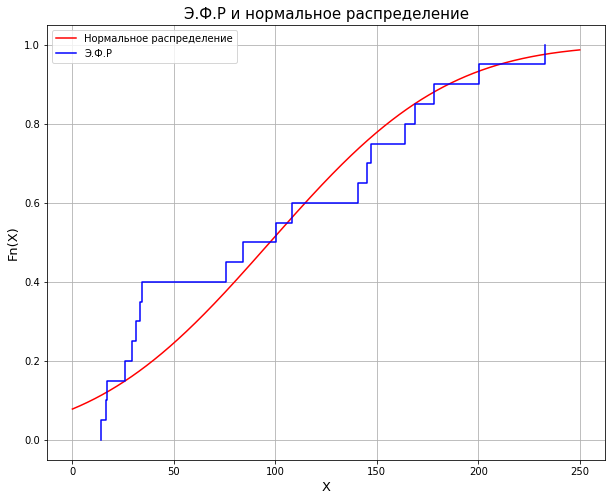

In [55]:
from statsmodels.distributions.empirical_distribution import ECDF

fig, ax = plt.subplots(figsize = (10,8))
mu , sigma = Ex_Pron, Std_Pron # мат ожидание и дисперсия
rv_normal = stats.norm(loc= mu, scale = sigma)
x = np.linspace(0,250,2000)
cdf = rv_normal.cdf(x) # нормальная функция распределения
ax.plot(x,cdf,'r')
ecdf = ECDF(Pron)
ax.step(ecdf.x,ecdf.y, where = 'post', c ='b')
ax.grid()
ax.set_title('Э.Ф.Р и нормальное распределение',fontsize = 15)
plt.legend(['Нормальное распределение','Э.Ф.Р'])
plt.ylabel('Fn(X)', fontsize= 13)
plt.xlabel('X',fontsize =13)

plt.show()

### Э.Ф.Р для пористости

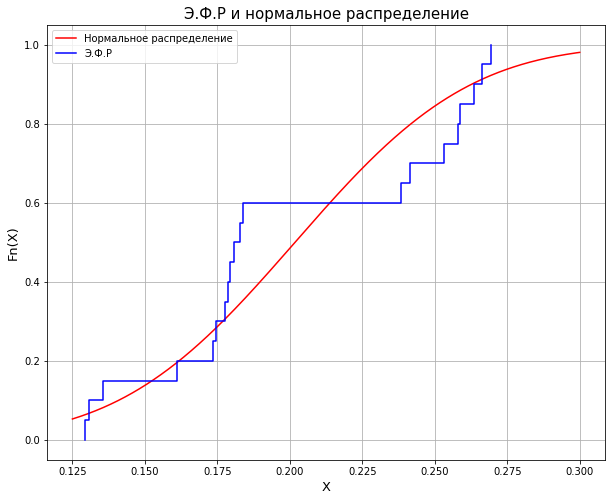

In [50]:
from statsmodels.distributions.empirical_distribution import ECDF

fig, ax = plt.subplots(figsize = (10,8))
mu , sigma = Ex_Por, Std_Por # мат ожидание и дисперсия
rv_normal = stats.norm(loc= mu, scale = sigma)
x = np.linspace(0.125,0.3,1000)
cdf = rv_normal.cdf(x) # нормальная функция распределения
ax.plot(x,cdf,'r')
ecdf = ECDF(Por)
ax.step(ecdf.x,ecdf.y, where = 'post', c ='b')
ax.grid()
ax.set_title('Э.Ф.Р и нормальное распределение',fontsize = 15)
plt.legend(['Нормальное распределение','Э.Ф.Р'])
plt.ylabel('Fn(X)', fontsize= 13)
plt.xlabel('X',fontsize =13)

plt.show()

## Критерий Колмогорова для проницаемости

In [57]:
#from scipy.stats import kstwo #распределение колмагорова
import math as m
mu , sigma = Ex_Pron, Std_Pron # мат ожидание и дисперсия
rv_normal = stats.norm(loc= mu, scale = sigma)
n = 20
Dn= []
R = []
for i in range(n):
    R.append(m.fabs(ecdf(Pron[i]) - rv_normal.cdf(Pron[i])))
    Dn.append(max([m.fabs((i/n) - rv_normal.cdf(Pron[i])), m.fabs(rv_normal.cdf(Pron[i])-((i-1)/n)) ]))

print("1 формула", max(R)) 
print("2 формула", max(Dn))
p1 = 0.90
p2 = 0.95
print('Квантиль распределения Колмагорова для n = 20 c доверительной вероятностью 0.90', stats.ksone.ppf(p1,20))
print('Квантиль распределения Колмагорова для n = 20 c доверительной вероятностью 0.95', stats.ksone.ppf(p2,20))


1 формула 0.22118439606244095
2 формула 0.18605066021861272
Квантиль распределения Колмагорова для n = 20 c доверительной вероятностью 0.90 0.23155534940864161
Квантиль распределения Колмагорова для n = 20 c доверительной вероятностью 0.95 0.2647335873372445


## Критерий Колмогорова для пористости


In [54]:
#from scipy.stats import kstwo #распределение колмагорова
import math as m
mu , sigma = Ex_Por, Std_Por # мат ожидание и дисперсия
rv_normal = stats.norm(loc= mu, scale = sigma)
n = 20
Dn= []
R = []
for i in range(n):
    R.append(m.fabs(ecdf(Por[i]) - rv_normal.cdf(Por[i])))
    Dn.append(max([m.fabs((i/n) - rv_normal.cdf(Por[i])), m.fabs(rv_normal.cdf(Por[i])-((i-1)/n)) ]))

print("1 формула", max(R)) 
print("2 формула", max(Dn))
p1 = 0.90
p2 = 0.95
print('Квантиль распределения Колмагорова для n = 20 c доверительной вероятностью 0.90', stats.ksone.ppf(p1,20))
print('Квантиль распределения Колмагорова для n = 20 c доверительной вероятностью 0.95', stats.ksone.ppf(p2,20))


1 формула 0.24794490002770225
2 формула 0.22815233219099906
Квантиль распределения Колмагорова для n = 20 c доверительной вероятностью 0.90 0.23155534940864161
Квантиль распределения Колмагорова для n = 20 c доверительной вероятностью 0.95 0.2647335873372445


### Гистограмма для пористости

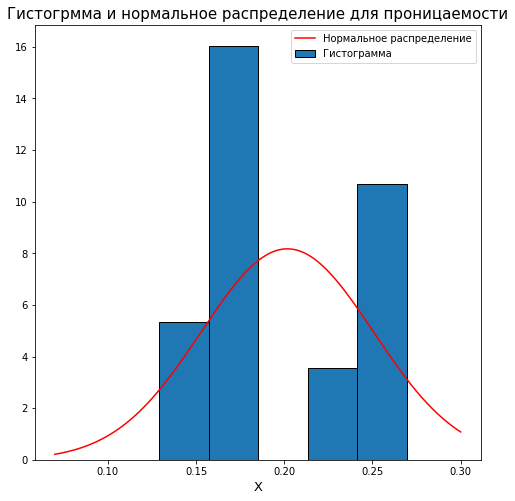

In [40]:
fig, ax = plt.subplots(figsize = (8,8))
ax.hist(Por, bins = 5, density = True,edgecolor = 'k')
mu, sigma = Ex_Por, Std_Por
rv_normal = stats.norm(loc= mu, scale = sigma)
x = np.linspace(0.07,0.3,1000)
pdf = rv_normal.pdf(x)
ax.plot(x,pdf,'r')
ax.set_title('Гистогрмма и нормальное распределение для проницаемости',fontsize = 15)
plt.legend(['Нормальное распределение','Гистограмма'])
plt.xlabel('X',fontsize =13)
plt.show()


### Гистограмма для проницаемости


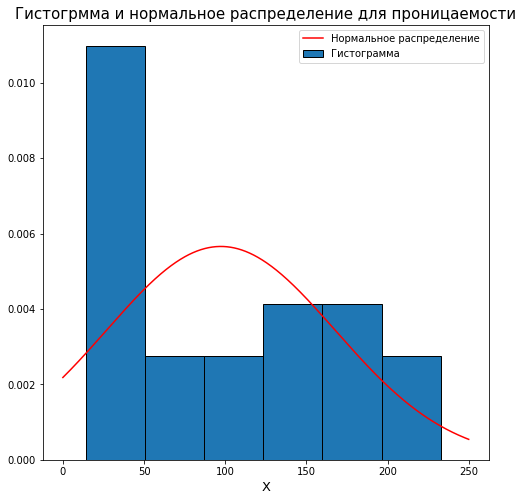

In [51]:
fig, ax = plt.subplots(figsize = (8,8))
ax.hist(Pron, bins = 6, density = True,edgecolor = 'k')
mu, sigma = Ex_Pron, Std_Pron
rv_normal = stats.norm(loc= mu, scale = sigma)
x = np.linspace(0,250,1000)
pdf = rv_normal.pdf(x)
ax.plot(x,pdf,'r')
ax.set_title('Гистогрмма и нормальное распределение для проницаемости',fontsize = 15)
plt.legend(['Нормальное распределение','Гистограмма'])
plt.xlabel('X',fontsize =13)
plt.show()


In [52]:
# Разделим выборку на 5 равных интервалов
X = np.linspace(min(Pron), max(Pron), 6)
N = []
for n in range(5):
    k = 0
    if n!=6:
        for i in no_sort_pron:
            if X[n] <= i<=X[n+1]:
                k+=1
    N.append(k)
print(X)
# Количество элементов в интервале
print('n1 = {0} n2 = {1} n3 = {2} n4 = {3} n5 ={4}   '.format(N[0], N[1],N[2],N[3], N[4]))

[ 14.2295  57.9313 101.6331 145.3349 189.0367 232.7385]
n1 = 8 n2 = 3 n3 = 3 n4 = 4 n5 =2   


### Критерий Пирсона для проницаемости

In [53]:
mu, sigma = Ex_Pron, Std_Pron
rv_normal = stats.norm(loc= mu, scale = sigma)
p1 = 0.90
p2 = 0.95
n = 20
SumX = 0 # будем хранить статистику пирсона
p=[]
p.append(rv_normal.cdf(X[1]) - rv_normal.cdf(-float('inf')))
for i in range(1,4):
    k = (rv_normal.cdf(X[i+1]) - rv_normal.cdf(X[i]))
    p.append(k)
p.append(rv_normal.cdf(float('inf')) - rv_normal.cdf(X[4]))
print('Вероятность поподания н.р. с.в. в интервалы\n',p)
print('Сумма вероятностьей = ', sum(p))
n = 20
for i in range(5):
    SumX += ((N[i]-n*p[i])**2)/(n*p[i])
print('Статистика Пирсона = ',SumX)

from scipy.stats import chi2
chi21 = chi2.ppf(p1, 5-1-2)
chi22 = chi2.ppf(p2, 5-1-2)
print('Квантиль хи - квадрат распределения с доверительной вероятностью 0.90 =',chi21)
print('Квантиль хи - квадрат распределения с доверительной вероятностью 0.95 =',chi22)

    
    

Вероятность поподания н.р. с.в. в интервалы
 [0.28823696657838593, 0.2361764943375888, 0.22765396358215018, 0.1512667727837811, 0.096665802718094]
Сумма вероятностьей =  1.0
Статистика Пирсона =  2.341669079651663
Квантиль хи - квадрат распределения с доверительной вероятностью 0.90 = 4.605170185988092
Квантиль хи - квадрат распределения с доверительной вероятностью 0.95 = 5.991464547107979


### Критерий Пирсона для пористости

In [54]:
# Разделим выборку на 5 равных интервалов
X = np.linspace(min(Por), max(Por), 6)
N = []
for n in range(5):
    k = 0
    if n!=6:
        for i in Por:
            if X[n] <= i<= X[n+1]:
                k+=1;
    N.append(k)
print(X)
# Количество элементов в интервале
print('n1 = {0} n2 = {1} n3 = {2} n4 = {3} n5 ={4}   '.format(N[0], N[1],N[2],N[3], N[4]))

[0.1292  0.15724 0.18528 0.21332 0.24136 0.2694 ]
n1 = 3 n2 = 9 n3 = 0 n4 = 2 n5 =6   


In [55]:
mu, sigma = Ex_Por, Std_Por
rv_normal = stats.norm(loc = mu, scale = sigma)

SumX = 0 # будем хранить статистику пирсона
p=[]
p.append(rv_normal.cdf(X[1]) - rv_normal.cdf(-float('inf')))
for i in range(1,4):
    k = (rv_normal.cdf(X[i+1]) - rv_normal.cdf(X[i]))
    p.append(k)
p.append(rv_normal.cdf(float('inf')) - rv_normal.cdf(X[4]))
print('Вероятность поподания н.р. с.в. в интервалы\n',p)
print('Сумма вероятностьей = ', sum(p))
n = 20
for j in range(5):
    SumX += (N[j]-n*p[j])**2/(n*p[j])
print('Статистика Пирсона = ',SumX)

from scipy.stats import chi2
chi21 = chi2.ppf(p1, 5-1-2)
chi22 = chi2.ppf(p2, 5-1-2)
print('Квантиль хи - квадрат распределения с доверительной вероятностью 0.90 =',chi21)
print('Квантиль хи - квадрат распределения с доверительной вероятностью 0.95 =',chi22)

    
    

Вероятность поподания н.р. с.в. в интервалы
 [0.18079439877511128, 0.18696754795493958, 0.22581979246648326, 0.19782827704483474, 0.20858998375863114]
Сумма вероятностьей =  1.0
Статистика Пирсона =  13.790875429023151
Квантиль хи - квадрат распределения с доверительной вероятностью 0.90 = 4.605170185988092
Квантиль хи - квадрат распределения с доверительной вероятностью 0.95 = 5.991464547107979
